In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import flatten, udf, col
from pyspark.sql.types import BooleanType
bucket = 'covidbucket531'
spark = SparkSession.builder\
    .appName("covid_project")\
    .config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-latest.jar")\
    .master('yarn')\
    .getOrCreate()

df = spark.read \
    .format("bigquery") \
    .load('charanfinalproject1.data531.orig')
df.show(10)

+-------------+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+-----+
|int64_field_0|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|DEATH|
+-------------+-----+------------+---+------------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+-----+
|           53|    0|           1|  0|           0|        0| 16|       0|       0|   0|     0|      0|           0|            0|             0|      0|            0|      0|                   7|    0|
|           84|    0|           1|  0|           0|        0| 90|       0|       0|   0|     0|      0|           0|            0|             0|      0|            0|      0|             

In [4]:
Data = df.toPandas()

ERROR:root:Exception while sending command.                                     
Traceback (most recent call last):
  File "/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3081, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'PNEUMONIA'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py", line 3826, in _set_item
    loc = self._info_axis.get_loc(key)
  File "/opt/conda/miniconda3/lib/python3.8/site-packages/p

In [5]:
Data.dtypes

int64_field_0           int64
USMER                   int64
MEDICAL_UNIT            int64
SEX                     int64
PATIENT_TYPE            int64
PNEUMONIA               int64
AGE                     int64
PREGNANT                int64
DIABETES                int64
COPD                    int64
ASTHMA                  int64
INMSUPR                 int64
HIPERTENSION            int64
OTHER_DISEASE           int64
CARDIOVASCULAR          int64
OBESITY                 int64
RENAL_CHRONIC           int64
TOBACCO                 int64
CLASIFFICATION_FINAL    int64
DEATH                   int64
dtype: object

In [6]:
Data.head()


,int64_field_0,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,53,0,1,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,7,0
1,84,0,1,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,7,0
2,152,1,2,0,0,1,14,0,0,0,0,0,0,0,0,0,0,0,7,1
3,154,1,2,0,0,1,17,0,0,0,0,0,0,0,0,0,0,0,7,1
4,155,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5,1


In [7]:
Data.shape

(1032572, 20)

In [11]:
Data.nunique()

int64_field_0           1032572
USMER                         2
MEDICAL_UNIT                 13
SEX                           2
PATIENT_TYPE                  2
PNEUMONIA                     2
AGE                         118
PREGNANT                      2
DIABETES                      2
COPD                          2
ASTHMA                        2
INMSUPR                       2
HIPERTENSION                  2
OTHER_DISEASE                 2
CARDIOVASCULAR                2
OBESITY                       2
RENAL_CHRONIC                 2
TOBACCO                       2
CLASIFFICATION_FINAL          7
DEATH                         2
dtype: int64

In [12]:
Data['USMER'].unique()
Data['USMER'].value_counts()

0    662660
1    369912
Name: USMER, dtype: int64

In [13]:
del Data[Data.columns[0]]

In [14]:
Data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,7,0
1,0,1,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,7,0
2,1,2,0,0,1,14,0,0,0,0,0,0,0,0,0,0,0,7,1
3,1,2,0,0,1,17,0,0,0,0,0,0,0,0,0,0,0,7,1
4,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5,1


In [15]:
import seaborn as sns

<AxesSubplot:>

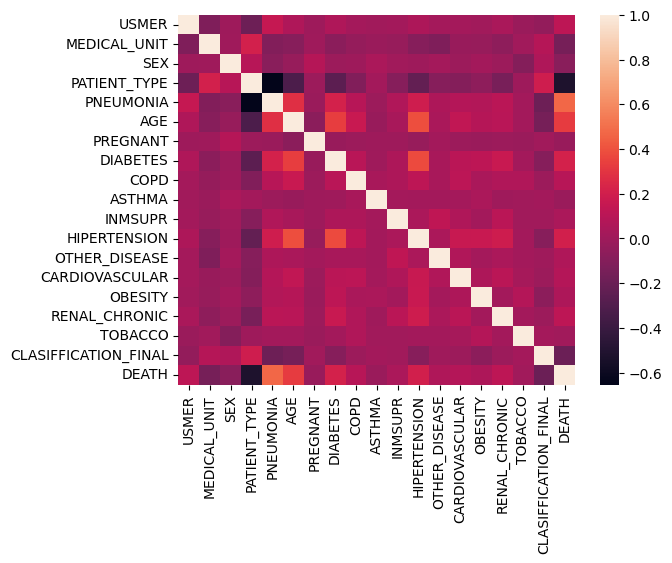

In [16]:
sns.heatmap(Data.corr())

In [17]:
data = Data

In [19]:
import numpy as np
x=len(data[(data['INMSUPR']==1.0) & (data['AGE'].isin(np.arange(15.0,30.0)))])
y=len(data[data['INMSUPR']==1.0])
print(x/y*100)

11.873867343240304


In [20]:
x=len(data[(data['INMSUPR']==1.0) & (data['AGE'].isin(np.arange(30.0,120.0)))])
y=len(data[data['INMSUPR']==1.0])
print(x/y*100)

79.68829285973179


<AxesSubplot:xlabel='AGE', ylabel='count'>

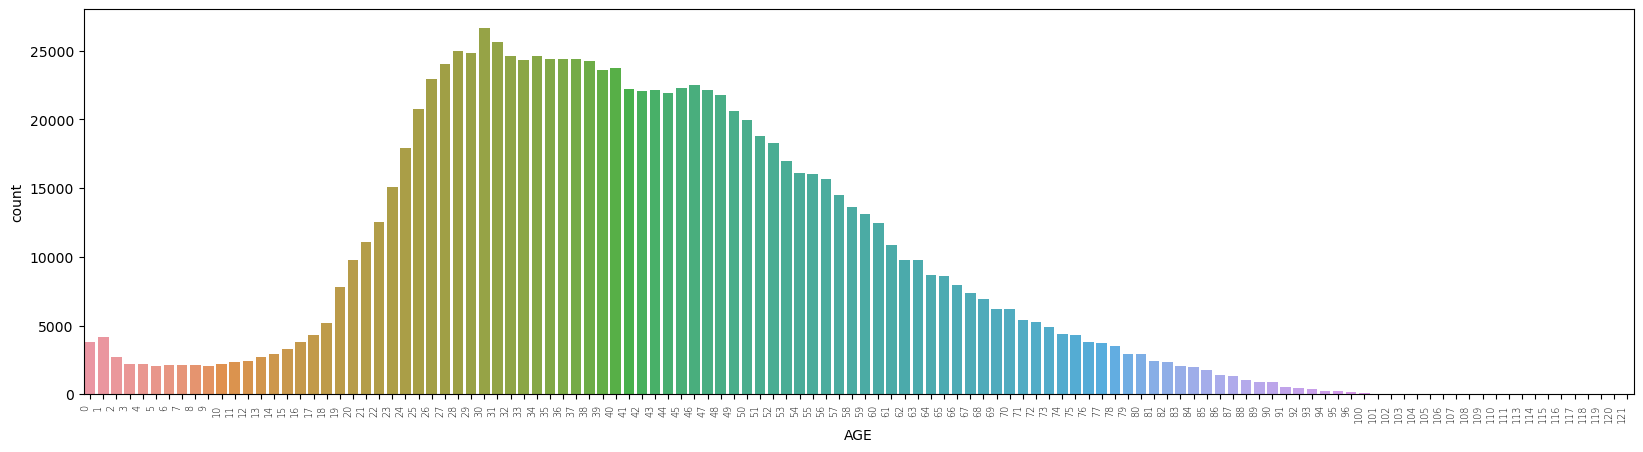

In [24]:
import matplotlib.pyplot as plt
data.head()
plt.figure(figsize=(20,5))
plt.xticks(rotation=90, horizontalalignment='right',fontweight='light',fontsize='x-small' )
sns.countplot(x='AGE', data=data)

<AxesSubplot:xlabel='PATIENT_TYPE,AGE'>

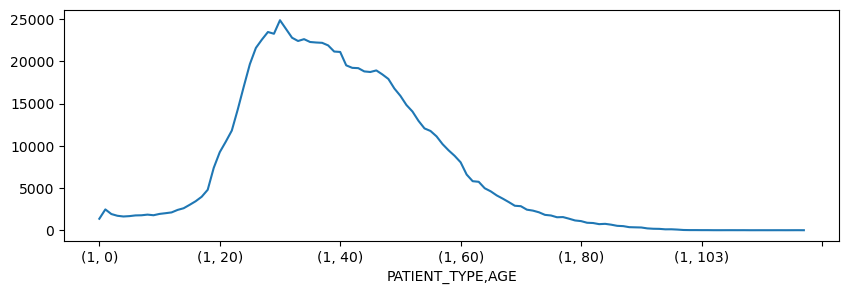

In [25]:
plt.rcParams["figure.figsize"] = (10,3)
df = data[data['PATIENT_TYPE']==1.0]
df.groupby('PATIENT_TYPE').AGE.value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='AGE'>

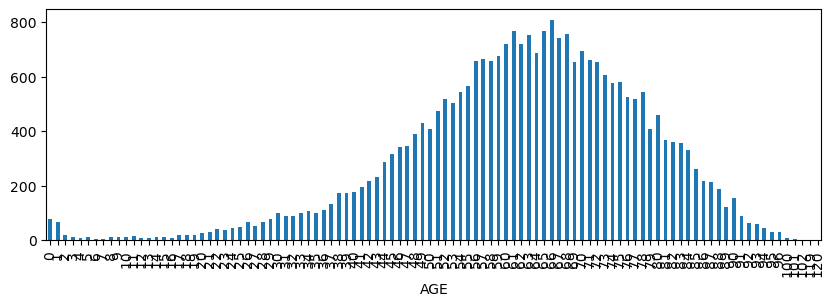

In [27]:
df = data[(data['SEX']==1.0) & (data['DEATH']== 1)]
df.groupby('AGE')['DEATH'].count().plot.bar()

In [30]:
med_hist = Data.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE', 'CLASIFFICATION_FINAL',
                              'DEATH'], axis=1)

<BarContainer object of 12 artists>

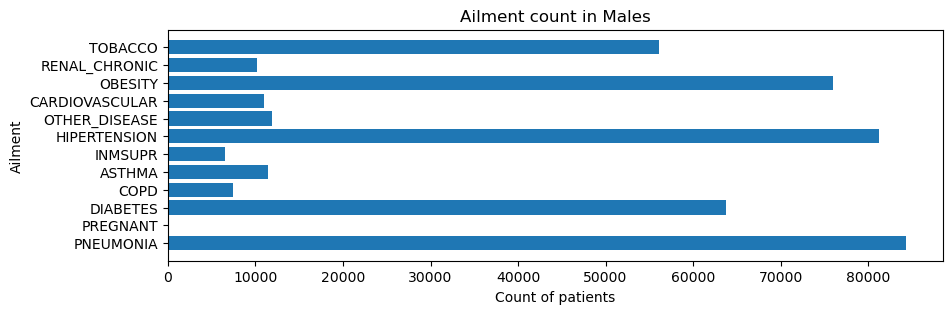

In [31]:
df = data[data['SEX']== 0]
ctr=[]
almt=[]
for i in med_hist.columns:
    ctr.append(len(df[df[i]==1.0]))
    almt.append(i)
plt.title('Ailment count in Males')
plt.xlabel('Count of patients')
plt.ylabel('Ailment')
plt.barh(y=almt, width=ctr)

<BarContainer object of 12 artists>

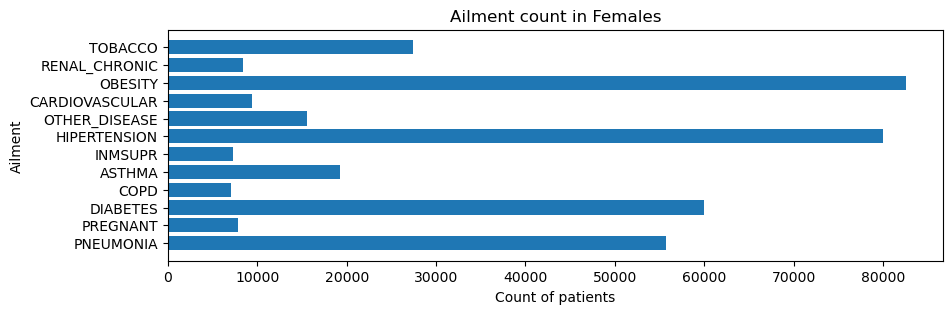

In [32]:
df = data[data['SEX']== 1]
ctr=[]
almt=[]
for i in med_hist.columns:
    ctr.append(len(df[df[i]==1.0]))
    almt.append(i)
plt.title('Ailment count in Females')
plt.xlabel('Count of patients')
plt.ylabel('Ailment')
plt.barh(y=almt, width=ctr)